In [ ]:
import community as community_louvain
import networkx as nx
from collections import Counter
import pandas as pd
from nltk.corpus import PlaintextCorpusReader
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Read the GCC
G = nx.read_gpickle("WG.gpickle")

G = G.to_undirected()

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

# compute the best partition
partition = community_louvain.best_partition(G0, random_state=1)

In [ ]:
# Find all node degress
degrees = [val for (node, val) in G0.degree()]

# Create node degree dataframe
df_community = pd.DataFrame()
df_community["Name"] = list(partition.keys())
df_community["Community"] = list(partition.values())
df_community["Degree"] = degrees

df_community_group = df_community.groupby(['Community', 'Name', 'Degree']).count().reset_index()

df_community_group = df_community_group.sort_values('Degree', ascending = False).groupby('Community').head(3)

df_community_group = df_community_group.groupby('Community')['Name'].agg(lambda col: '-'.join(col)).reset_index()
df_community_group.columns = ['CommunityID', 'CommunityName']

In [ ]:
# Add communities to each node 
df_community = pd.merge(df_community, df_community_group, left_on="Community", right_on="CommunityID")
community_names = df_community[["Name", "CommunityName"]].set_index('Name').T.to_dict('records')[0]
nx.set_node_attributes(G, community_names, name="community")

In [ ]:
# Vader imports
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def calculate_Vader_sentiment(node):
    try: 

        # The dialog for the character 
        with open(f"/work/socialgraph-witcher-analysis/notebooks/data_clean_texts/{node.replace(' ', '_')}.txt") as f:
            character_text = f.read()

        analyzer = SentimentIntensityAnalyzer()

        sentiment = analyzer.polarity_scores(character_text)["compound"]

        # Return average sentiment
        return sentiment

    except:
        return -99

In [ ]:
for node in G0.nodes():
    G0.nodes()[node]["Vader_Sentiment"] = calculate_Vader_sentiment(node)

In [ ]:
df_sentiment = pd.DataFrame.from_dict(dict(G0.nodes(data=True)), orient='index').reset_index().rename(columns = {'index':'Name'})
df_sentiment

,Name,Race,Gender,Nationality,Family,Profession,community,Vader_Sentiment
0,Innkeeper,No Race,No Gender,No Nationality,No Family,No Profession,Gwent players-The Witcher 3 merchants-Blacksmith,0.4404
1,The Witcher journal character entries,No Race,No Gender,No Nationality,No Family,No Profession,The Witcher journal character entries-Thaler (...,-0.2960
2,Abigail,Human,Female,Temerian,No Family,Witch,The Witcher journal character entries-Thaler (...,-0.9913
3,Adalbert (soldier),Human,Male,Temerian,No Family,Soldier,The Witcher journal character entries-Thaler (...,-0.1280
4,Adam (Murky Waters),Human,Male,Temerian,No Family,Poet,The Witcher journal character entries-Thaler (...,-0.9892
...,...,...,...,...,...,...,...,...
728,Yanne,Human,Male,Skelliger,No Family,Blacksmith,Gwent players-The Witcher 3 merchants-Blacksmith,-0.9169
729,Yaren,Human,Male,Temerian,No Family,No Profession,Crones-Phillip Strenger-Anna Strenger,-0.9313
730,Yoana,Human,Female,Skelliger,Clan Tordarroch,Armorer,Gwent players-The Witcher 3 merchants-Blacksmith,0.9643
731,Yolar,Human,Male,Skelliger,No Family,Druid,Ciri-Triss Merigold-Yennefer of Vengerberg,0.3818


In [ ]:
#df_sentiment.to_csv("/work/socialgraph-witcher-analysis/data/characters_sentiment.csv", index=False)

## For Website

In [ ]:
df_sentiment = pd.read_csv("/work/socialgraph-witcher-analysis/data/characters_sentiment.csv")
df_sentiment

,Name,Race,Gender,Nationality,Family,Profession,community,Vader_Sentiment
0,Innkeeper,No Race,No Gender,No Nationality,No Family,No Profession,Gwent players-The Witcher 3 merchants-Blacksmith,0.4404
1,The Witcher journal character entries,No Race,No Gender,No Nationality,No Family,No Profession,The Witcher journal character entries-Thaler (...,-0.2960
2,Abigail,Human,Female,Temerian,No Family,Witch,The Witcher journal character entries-Thaler (...,-0.9913
3,Adalbert (soldier),Human,Male,Temerian,No Family,Soldier,The Witcher journal character entries-Thaler (...,-0.1280
4,Adam (Murky Waters),Human,Male,Temerian,No Family,Poet,The Witcher journal character entries-Thaler (...,-0.9892
...,...,...,...,...,...,...,...,...
728,Yanne,Human,Male,Skelliger,No Family,Blacksmith,Gwent players-The Witcher 3 merchants-Blacksmith,-0.9169
729,Yaren,Human,Male,Temerian,No Family,No Profession,Crones-Phillip Strenger-Anna Strenger,-0.9313
730,Yoana,Human,Female,Skelliger,Clan Tordarroch,Armorer,Gwent players-The Witcher 3 merchants-Blacksmith,0.9643
731,Yolar,Human,Male,Skelliger,No Family,Druid,Ciri-Triss Merigold-Yennefer of Vengerberg,0.3818


In [ ]:
#function for creating plots and lists of saddest/happiest entities, based on choice of attribute (including community), based on vader.

In [ ]:
def create_sentiment_analysis(df_sentiment, attribute):
    df_grouped = df_sentiment[[attribute, "Vader_Sentiment"]].groupby(attribute).mean().reset_index()
    df_grouped['Vader_std'] = df_sentiment[[attribute, "Vader_Sentiment"]].groupby(attribute).std().reset_index()['Vader_Sentiment']

    df_happy = df_grouped.sort_values("Vader_Sentiment", ascending=False).head(5)
    df_unhappy = df_grouped.sort_values("Vader_Sentiment").head(5)
    return df_happy, df_unhappy, df_grouped

In [ ]:
def make_plot(df_grouped, attribute):
    if attribute == 'Name':
        x = [i for i in df_grouped["Name"]]
        y = [i for i in df_grouped["Vader_Sentiment"]]
        cmap = plt.cm.get_cmap('viridis')
        color = cmap(y)

        for i in range(7):
            plt.figure(figsize=(24,3))
            plt.bar(x[(i*105):((i+1)*105)], y[(i*105):((i+1)*105)],color=color[(i*105):((i+1)*105),:], capsize=3)
            plt.xticks(rotation=45, horizontalalignment="right")
            plt.ylabel(f"Sentiment Score")
            plt.show()

    elif attribute == 'Profession':
        x = [i for i in df_grouped["Profession"]]
        y = [i for i in df_grouped["Vader_Sentiment"]]
        cmap = plt.cm.get_cmap('viridis')
        color = cmap(y)

        for i in range(2):
            plt.figure(figsize=(24,3))
            plt.bar(x[(i*80):((i+1)*80)], y[(i*80):((i+1)*80)],color=color[(i*80):((i+1)*80),:], capsize=3)
            plt.xticks(rotation=45, horizontalalignment="right")
            plt.ylabel(f"Sentiment Score")
            plt.show()


    else:
        cmap = plt.cm.get_cmap('RdYlGn')
        color = cmap(df_grouped['Vader_Sentiment'])

        plt.figure(figsize=(12,8))
        plt.bar(df_grouped[attribute], df_grouped['Vader_Sentiment'],  yerr=df_grouped['Vader_std'], color=color, capsize=3)
        plt.xticks(rotation=45, horizontalalignment="right")
        plt.ylabel(f"Sentiment Score")
        plt.show()


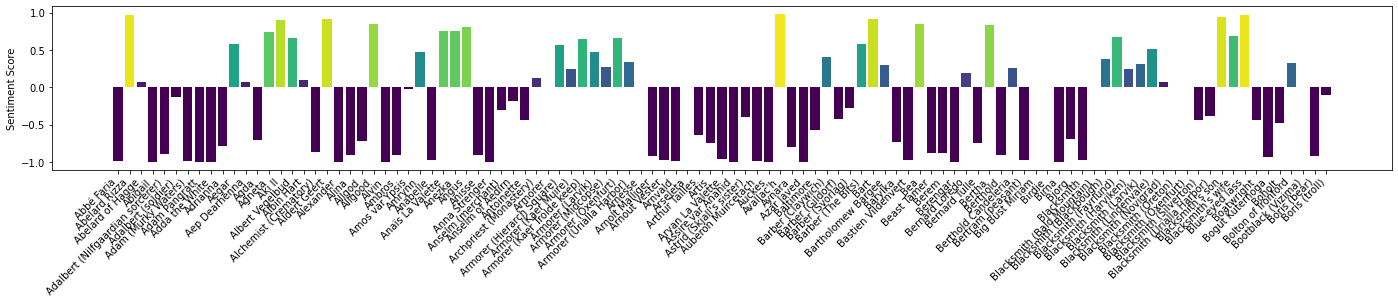

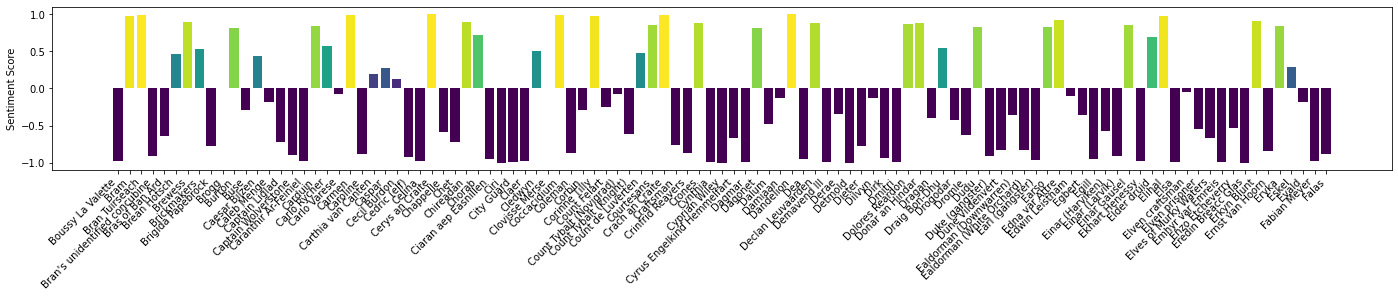

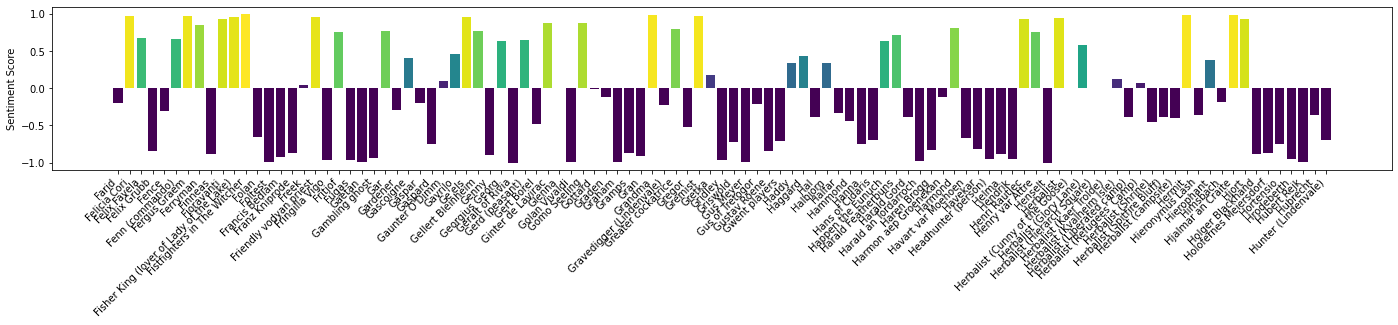

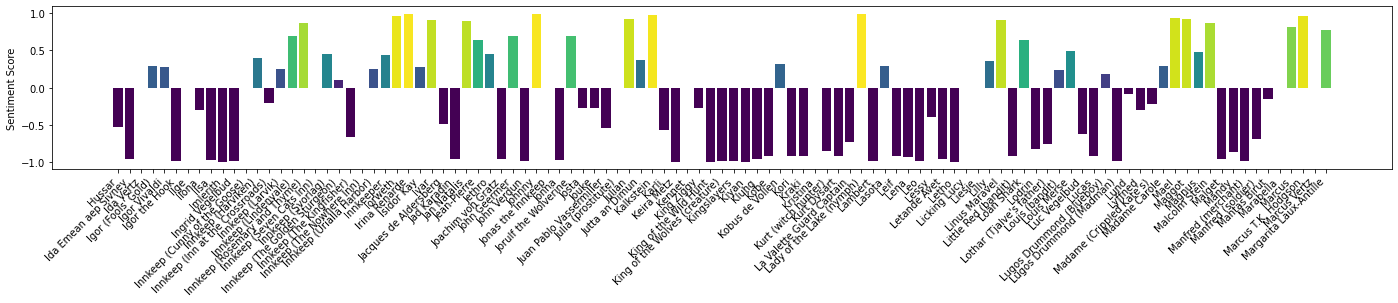

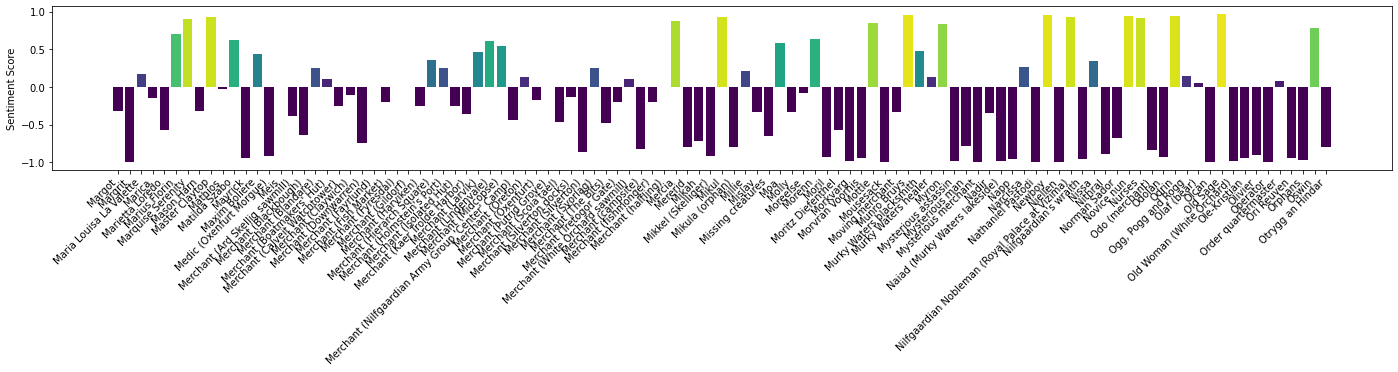

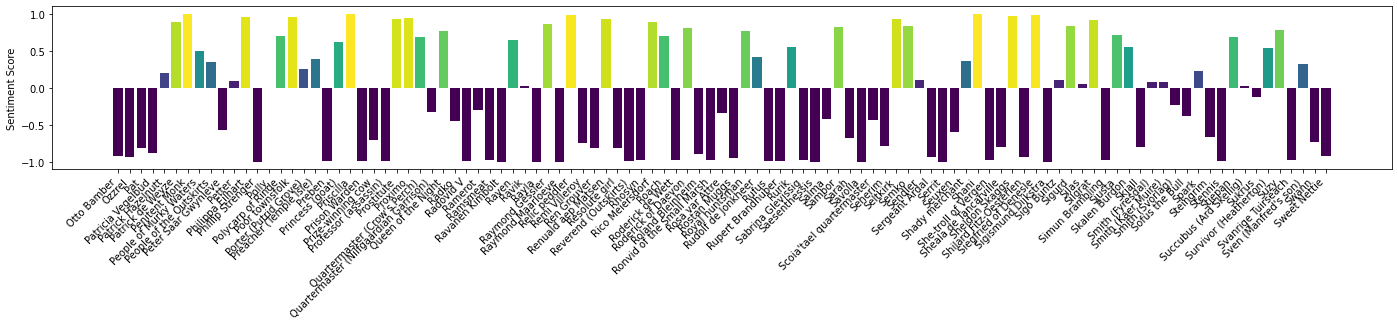

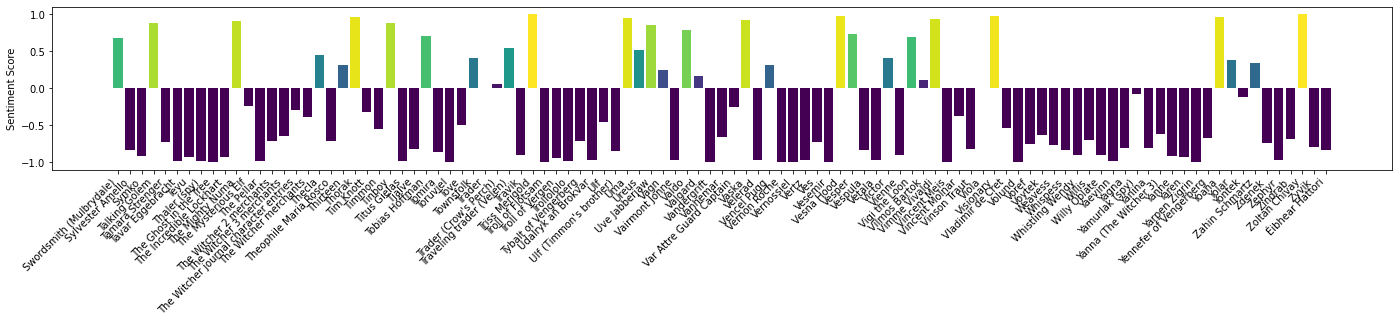

In [ ]:
attribute = 'Name'
df_happy, df_unhappy, df_grouped = create_sentiment_analysis(df_sentiment, attribute=attribute)
make_plot(df_grouped, attribute=attribute)

In [ ]:
df_happy

,Name,Vader_Sentiment,Vader_std
665,Triss Merigold,0.9997,NaN
599,Shani,0.9997,NaN
163,Dandelion,0.9997,NaN
221,Fistfighters in The Witcher,0.9984,NaN
132,Cerys an Craite,0.9978,NaN


In [ ]:
df_unhappy

,Name,Vader_Sentiment,Vader_std
244,Geralt of Rivia,-1.0000,NaN
138,Ciri,-0.9999,NaN
202,Eredin Bréacc Glas,-0.9996,NaN
290,Henselt,-0.9996,NaN
157,Cyprian Wiley,-0.9996,NaN


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>